***
## [Nov 2018] - Looking at the front end moveable mask alignment with the YAG screen
### Abstract:
We know that it's not possible to completely cut off the beam with the front end movable mask, but we also started to suspect that the mask doesn't close down on the center of the beam.

To check this we asked for 0.9mA ring current and dropped down the YAG screen in front of the movable mask. This screen is 8.5m from the source. It has a grid etched on it with cell size (x,y)=(1.4mm,1mm). The screen is mounted 45 degrees to the beam, and the camera is 45 degrees to the screen. With this arrangement the camera image looks just like it would if the beam hit it at normal incidence and you were viewing it at normal incidence.

The screen is water cooled, but even with only 1mA you'll destroy it at small gaps. These images were taken at EPU gap,phase = 50mm,42mm
***

In [1]:
from pylab import *
from pathlib import Path   # Use the path library to avoid problems with windows vs mac/linux slashes in paths
from BLOCH_beamline import *
import matplotlib.patches as patches

import imageio


%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 02.11.2018 

	Latest change: load SPECTRA files



### Close down the movable mask to locate the limits in the camera frame

im02 corresponds to mm1_x, mm2_x = (-5.53, -6.25), and these are the limits.

mm1_x is cutting from the left of the image, mm2_x from the right.

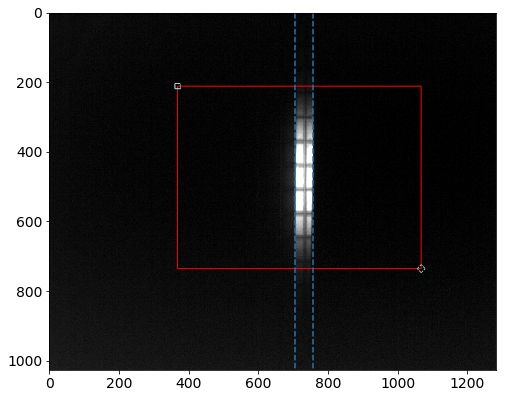

In [2]:
im02 = imageio.imread('Data/Nov18_FrontEndScreen/im02.png')

fig = plt.figure(figsize=(8,8))
imshow(im02, extent=[0,1282,1026,0], aspect=1)
plt.plot([705,705],[0,1026],color='tab:blue',linestyle='--')
plt.plot([758,758],[0,1026],color='tab:blue',linestyle='--')
plt.show()

im03 corresponds to mm1_y, mm2_y = (-5.47, -5.25), and these are the limits.

mm1_y is cutting from the bottom, mm2_y from the top

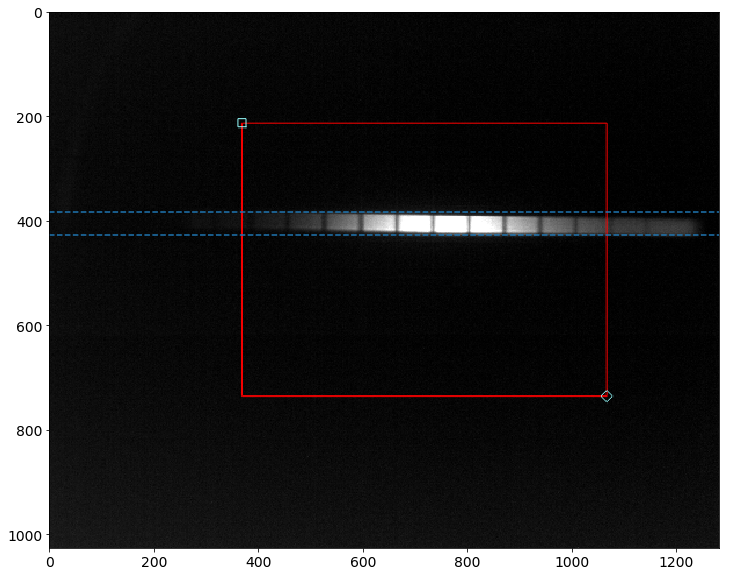

In [3]:
im03 = imageio.imread('Data/Nov18_FrontEndScreen/im03.png')
fig = plt.figure(figsize=(12,12))
imshow(im03, extent=[0,1282,1026,0], aspect=1)
plt.plot([0,1282],[383,383],color='tab:blue',linestyle='--')
plt.plot([0,1282],[427,427],color='tab:blue',linestyle='--')
plt.show()

### Compare this with the initial beam position

It's clear that the minimum movable mask aperture is badly misaligned:

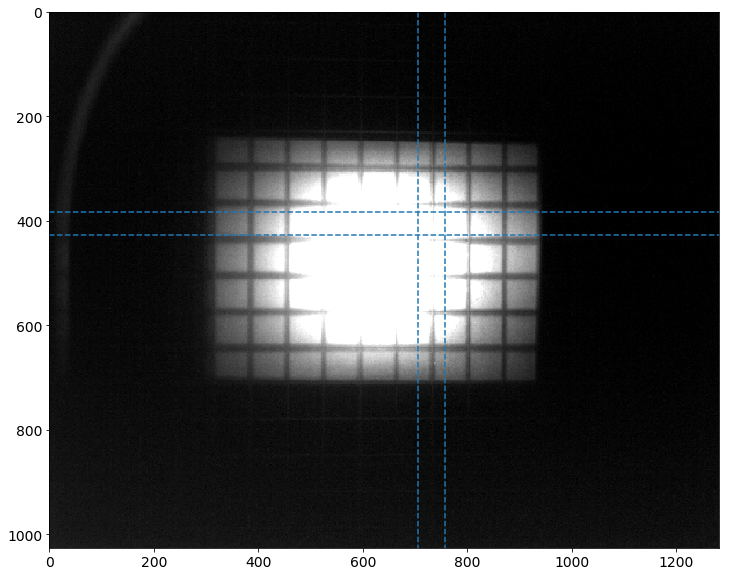

In [4]:
im01 = imageio.imread('Data/Nov18_FrontEndScreen/im01.png')
fig = plt.figure(figsize=(12,12))
imshow(im01, extent=[0,1282,1026,0], aspect=1)
plt.plot([705,705],[0,1026],color='tab:blue',linestyle='--')
plt.plot([758,758],[0,1026],color='tab:blue',linestyle='--')
plt.plot([0,1282],[383,383],color='tab:blue',linestyle='--')
plt.plot([0,1282],[427,427],color='tab:blue',linestyle='--')
plt.show()

The mapping here seems to be: 1mm =70px

### Request a modified beam position

We asked the control room for a -170urad horizontal shift. That makes the horizontal alignment much better, but we are still off vertically.

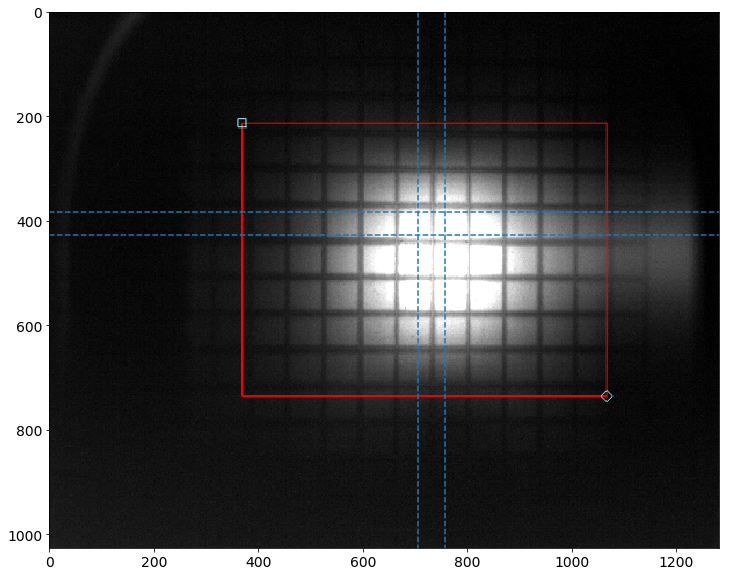

In [5]:
im04 = imageio.imread('Data/Nov18_FrontEndScreen/im04.png')
fig = plt.figure(figsize=(12,12))
imshow(im04, extent=[0,1282,1026,0], aspect=1)
plt.plot([705,705],[0,1026],color='tab:blue',linestyle='--')
plt.plot([758,758],[0,1026],color='tab:blue',linestyle='--')
plt.plot([0,1282],[383,383],color='tab:blue',linestyle='--')
plt.plot([0,1282],[427,427],color='tab:blue',linestyle='--')
plt.show()

Based on the image above, with this 170urad offset the smallest centered aperture that the moveable mask can make is approximately 3x3mm (limited by mm2_y). This corresponds to settings of:

In [6]:
print("mm1_x = {0:.2f}".format(-5.53+ ((705-640)/70)))
print("mm2_x = {0:.2f}".format(-6.25+ ((850-758)/70)))

print("mm1_y = {0:.2f}".format(-5.47+ ((585-427)/70)))
print("mm2_y = {0:.2f}".format(-5.25+ ((383-375)/70)))

mm1_x = -4.60
mm2_x = -4.94
mm1_y = -3.21
mm2_y = -5.14


In [2]:
-4.6-(-3.9)
-2.7-(-3.2)

0.5

And it would look like this:

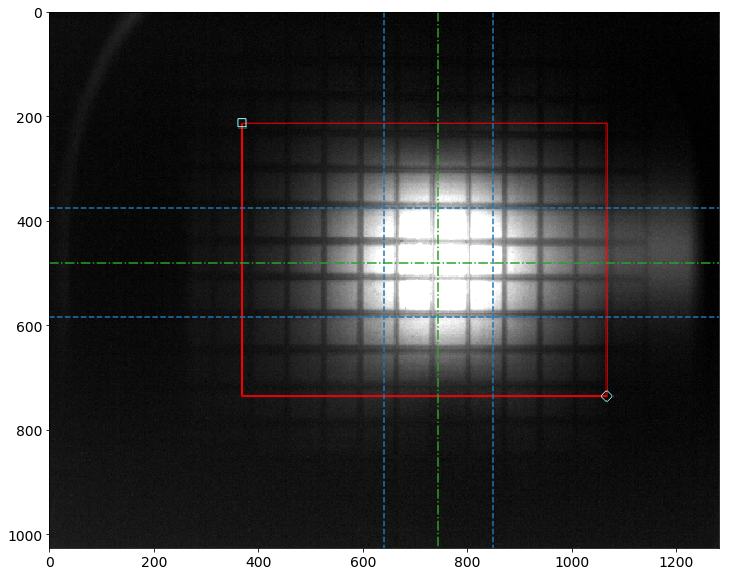

In [7]:
im04 = imageio.imread('Data/Nov18_FrontEndScreen/im04.png')
fig = plt.figure(figsize=(12,12))
imshow(im04, extent=[0,1282,1026,0], aspect=1)
plt.plot([640,640],[0,1026],color='tab:blue',linestyle='--')
plt.plot([850,850],[0,1026],color='tab:blue',linestyle='--')
plt.plot([0,1282],[375,375],color='tab:blue',linestyle='--')
plt.plot([0,1282],[585,585],color='tab:blue',linestyle='--')

plt.plot([0,1282],[480,480],color='tab:green',linestyle='-.')
plt.plot([745,745],[0,1026],color='tab:green',linestyle='-.')

plt.show()